In [1]:
# Testing gpu
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# which GPU using?
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15912272986735519906, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1023994389334615637
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [13]:
!pip install -q Keras

In [14]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('/content/drive/MyDrive/ZikaVirus/classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [7]:
df.shape

(155223, 19)

In [8]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [9]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [15]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.0,0.602941,1.0,0.531429,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.0,0.602941,1.0,0.531429,0.333333,0.181818
2,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.0,0.602941,1.0,0.531429,0.333333,0.181818
3,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.0,0.602941,1.0,0.531429,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.0,0.705882,1.0,0.274286,0.333333,0.181818


In [16]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10, stratify=y) #train test split in 50:50 ratio

In [17]:
X_train.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
154629,0.001297,0.804145,0.467190,0.776119,0.895522,0.0,0.625806,0.26,0.962264,0.098901,0.28,0.634409,0.016999,0.588235,0.9,0.354286,0.666667,0.636364
143156,0.002138,0.708354,0.334943,0.895522,0.746269,0.0,0.625806,0.31,0.830189,0.065934,0.22,0.537634,0.000000,0.485294,0.8,0.334286,0.666667,0.272727
136771,0.027758,0.670686,0.371330,0.805970,0.776119,0.0,0.625806,0.23,0.886792,0.043956,0.18,0.709677,0.000000,0.514706,0.9,0.605714,0.666667,0.727273
27909,0.017739,0.578125,0.553618,0.611940,0.656716,0.0,0.625806,0.14,0.754717,0.054945,0.23,0.741935,0.011137,0.529412,0.9,0.448571,0.333333,0.181818
30973,0.023659,0.583067,0.558247,0.597015,0.626866,0.0,0.625806,0.22,0.735849,0.043956,0.41,0.817204,0.029015,0.544118,0.7,0.557143,0.333333,0.181818


In [19]:
X_train.shape

(77611, 18)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [23]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 18))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.50, batch_size = 10, epochs = 100)

Epoch 1/100
3881/3881 [==============================] - 22s 5ms/step - loss: 0.6718 - accuracy: 0.5908 - val_loss: 0.6642 - val_accuracy: 0.5961
Epoch 2/100
3881/3881 [==============================] - 19s 5ms/step - loss: 0.6621 - accuracy: 0.5992 - val_loss: 0.6586 - val_accuracy: 0.6082
Epoch 3/100
3881/3881 [==============================] - 24s 6ms/step - loss: 0.6574 - accuracy: 0.6048 - val_loss: 0.6554 - val_accuracy: 0.6101
Epoch 4/100
3881/3881 [==============================] - 23s 6ms/step - loss: 0.6538 - accuracy: 0.6057 - val_loss: 0.6511 - val_accuracy: 0.6102
Epoch 5/100
3881/3881 [==============================] - 23s 6ms/step - loss: 0.6508 - accuracy: 0.6086 - val_loss: 0.6500 - val_accuracy: 0.6110
Epoch 6/100
3881/3881 [==============================] - 19s 5ms/step - loss: 0.6488 - accuracy: 0.6107 - val_loss: 0.6471 - val_accuracy: 0.6143
Epoch 7/100
3881/3881 [==============================] - 19s 5ms/step - loss: 0.6469 - accuracy: 0.6139 - val_loss: 0.6458 -

In [24]:
print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


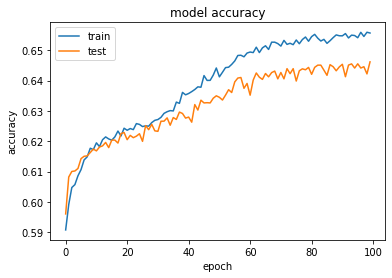

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

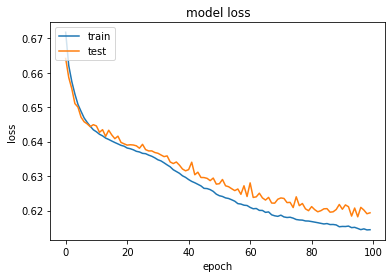

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [29]:
cm

array([[32988, 11934],
       [15289, 17401]])

In [30]:
score

0.6492423851981652

In [32]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer= 'he_uniform',activation='relu',input_dim = 18))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.40, batch_size = 20, epochs = 200)

Epoch 1/200
2329/2329 [==============================] - 11s 5ms/step - loss: 0.6690 - accuracy: 0.5850 - val_loss: 0.6583 - val_accuracy: 0.5998
Epoch 2/200
2329/2329 [==============================] - 13s 6ms/step - loss: 0.6547 - accuracy: 0.6038 - val_loss: 0.6495 - val_accuracy: 0.6141
Epoch 3/200
2329/2329 [==============================] - 11s 5ms/step - loss: 0.6483 - accuracy: 0.6133 - val_loss: 0.6450 - val_accuracy: 0.6153
Epoch 4/200
2329/2329 [==============================] - 11s 5ms/step - loss: 0.6441 - accuracy: 0.6190 - val_loss: 0.6423 - val_accuracy: 0.6233
Epoch 5/200
2329/2329 [==============================] - 11s 5ms/step - loss: 0.6412 - accuracy: 0.6217 - val_loss: 0.6403 - val_accuracy: 0.6181
Epoch 6/200
2329/2329 [==============================] - 11s 5ms/step - loss: 0.6391 - accuracy: 0.6226 - val_loss: 0.6408 - val_accuracy: 0.6240
Epoch 7/200
2329/2329 [==============================] - 11s 5ms/step - loss: 0.6369 - accuracy: 0.6254 - val_loss: 0.6365 -

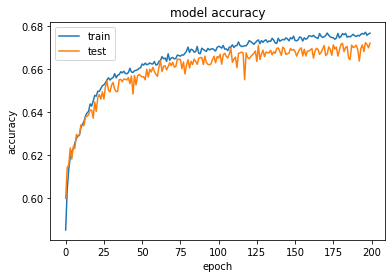

In [33]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

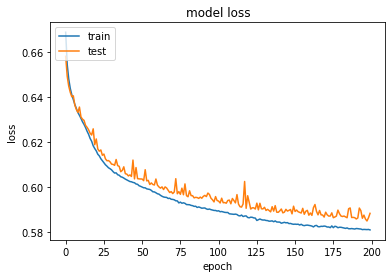

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [36]:
cm

array([[36660,  8262],
       [17254, 15436]])

In [37]:
score

0.6712364067412255